In [4]:
# To Calculate Polarity and Subjectivity of review
import csv
import pandas as pd
from textblob import TextBlob as TB
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.linear_model import LinearRegression 

df = pd.read_csv("yelp_review.csv",  sep=",",parse_dates=['date'])

polarity=list()
subjectivity_list = list()
sentiment_list = list()

for row in df["text"]:
    sentences = str(row)
    blob = TB(sentences)
    polarity.append(blob.sentiment.polarity)
    subjectivity_list.append(blob.sentiment.subjectivity)
    
    if blob.sentiment.polarity == 0:
        X="neutral" 
        sentiment_list.append("neutral")
    elif blob.sentiment.polarity < 0:
        X="negative"
        sentiment_list.append("negative")
    elif blob.sentiment.polarity > 0:
        X="positive"
        sentiment_list.append("positive")
         
df["Polarity"]=polarity
df["sentiment_list"]=sentiment_list
df["subjectivity_list"]=subjectivity_list

df.head()
df.to_csv('yelp.csv', index=False)

In [15]:
# Simple liner regession for polarity vs stars/useful/funny/cool
df1 = df.sample(frac=0.1, replace=True)

In [2]:
Polarity=df1["Polarity"]
stars= df1["stars"]
useful= df1["useful"]
funny = df1["funny"]
cool = df1["cool"]

In [3]:
from scipy.stats import linregress
linregress(Polarity,stars)

LinregressResult(slope=3.811552413881844, intercept=2.8221128311578556, rvalue=0.6096436457894355, pvalue=0.0, stderr=0.00683219672904299)

In [4]:
linregress(Polarity,useful)

LinregressResult(slope=-1.5730980976144329, intercept=1.7652573072563071, rvalue=-0.06388585292958865, pvalue=0.0, stderr=0.03387677438568601)

In [5]:
linregress(Polarity,funny)

LinregressResult(slope=-0.6760358961535422, intercept=0.6746200185218271, rvalue=-0.042934502209185474, pvalue=3.9705075903333004e-213, stderr=0.02168711060583989)

In [6]:
linregress(Polarity,cool)

LinregressResult(slope=-0.11125319659902312, intercept=0.6112616314865822, rvalue=-0.011234077130848251, pvalue=3.665159069300699e-16, stderr=0.013651699256859783)

In [94]:
df1.to_csv('yeplex.csv', index=False)

In [111]:
df2 = df.sample(frac=0.001, replace=True)

In [112]:
Polarity2=df2["Polarity"]
stars2= df2["stars"]

In [113]:
lr = LinearRegression()

In [114]:
from scipy.stats import linregress
import numpy as np
Polarity2 =Polarity2.values.reshape(-1, 1)
stars2 =stars2.values.reshape(-1, 1)

In [115]:
lr.fit(Polarity2,stars2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
print(lr.intercept_)

[2.80323737]


In [117]:
print(lr.coef_)

[[3.87324962]]


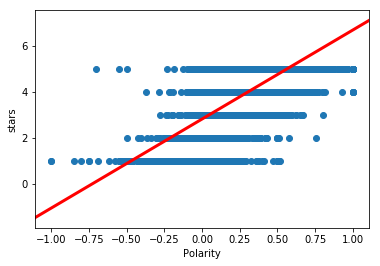

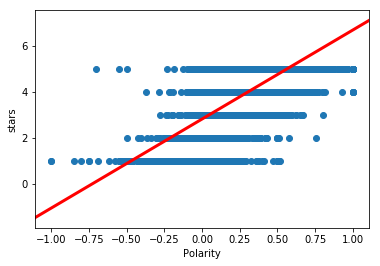

In [118]:
fig, ax = plt.subplots()
fig.clf()
ax = fig.add_subplot(111)
ax.set_xlabel("Polarity")
ax.set_ylabel("stars")
ax.scatter(Polarity2,stars2)
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [lr.predict(xmin)[0][0], lr.predict(xmax)[0][0]], linewidth=3, color="red")
ax.set_xlim([xmin, xmax])
fig

In [8]:
df['text length'] = df['text'].apply(len)
df.head()

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool  Polarity sentiment_list  subjectivity_list  \
0     0.0    0.0   0.0  0.251389       positive           0.474802   
1     0.0    0.0   0.0  0.291667       positive           0.508333   
2     0.0    0.0   0.0  0.295833       positive           0.404167   
3     0.0    0.0   0.0  0.192857       positive           0.496703   
4     0.0    0.0   0.0  0.530000       positive           0.700000   

   text length  
0          215  
1          506  
2          375  
3          527  
4          234

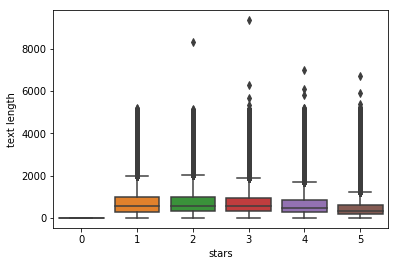

In [11]:
#correlation
sns.boxplot(x='stars', y='text length', data=df)

In [12]:
stars = df.groupby('stars').mean()
stars.corr()

useful     funny      cool  Polarity  subjectivity_list  \
useful             1.000000  0.797196 -0.767888 -0.943088          -0.882484   
funny              0.797196  1.000000 -0.442861 -0.892805          -0.925745   
cool              -0.767888 -0.442861  1.000000  0.792941           0.731765   
Polarity          -0.943088 -0.892805  0.792941  1.000000           0.986273   
subjectivity_list -0.882484 -0.925745  0.731765  0.986273           1.000000   
text length        0.872863  0.981337 -0.499477 -0.897128          -0.946437   

                   text length  
useful                0.872863  
funny                 0.981337  
cool                 -0.499477  
Polarity             -0.897128  
subjectivity_list    -0.946437  
text length           1.000000

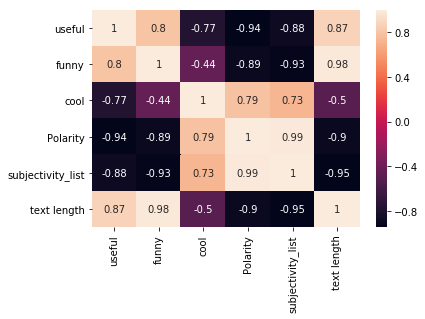

In [13]:
#Heatmap
sns.heatmap(data=stars.corr(), annot=True)

In [1]:
#machine learning algorithms for prediction accurecy
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
cv = CountVectorizer()
df3 = pd.read_csv("yelp_review.csv",  sep=",",parse_dates=['date'])

In [2]:
df4 = df3.sample(frac=0.001, replace=True)

In [3]:
x = df4['text']
y = df4['stars']

In [4]:
#To remove stopwords
from nltk.corpus import stopwords
import string
def text_clean(message):
    nopunc = [i for i in message if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split()
    nostop = [words for words in nn if words not in stopwords.words('english')]
    return(nostop)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv_transformer = CountVectorizer(analyzer = text_clean)

In [6]:
x = cv_transformer.fit_transform(x)

In [7]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
predictions = nb.predict(x_test)
predictions

array([4, 5, 5, ..., 5, 5, 4], dtype=int64)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[158   4   1  17  30]
 [ 38   4   9  36  49]
 [ 14   2   4  84  53]
 [  8   2   7 147 215]
 [ 16   2   3  87 589]]


             precision    recall  f1-score   support

          1       0.68      0.75      0.71       210
          2       0.29      0.03      0.05       136
          3       0.17      0.03      0.04       157
          4       0.40      0.39      0.39       379
          5       0.63      0.85      0.72       697

avg / total       0.50      0.57      0.52      1579



In [11]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini')
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
pred_rf = rf.predict(x_test)

In [13]:
print("Confusion Matrix\n",confusion_matrix(y_test, pred_rf))
print("\n")
print("Classification report\n",classification_report(y_test, pred_rf))

Confusion Matrix
 [[115   3   7  28  57]
 [ 33   9  10  31  53]
 [ 22   1  18  49  67]
 [ 21   5  28  95 230]
 [ 22   1  14  86 574]]


Classification report
              precision    recall  f1-score   support

          1       0.54      0.55      0.54       210
          2       0.47      0.07      0.12       136
          3       0.23      0.11      0.15       157
          4       0.33      0.25      0.28       379
          5       0.59      0.82      0.68       697

avg / total       0.47      0.51      0.47      1579



In [15]:
#Logistic Regression
from sklearn import linear_model
lg = linear_model.LogisticRegression(C=1.5)
lg.fit(x_train, y_train)


LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
pred_lg = lg.predict(x_test)

In [17]:
print(confusion_matrix(y_test,pred_lg ))
print("\n")
print(classification_report(y_test,pred_lg))

[[140  15   5  13  37]
 [ 42  21  24  21  28]
 [ 12  13  44  55  33]
 [  6   8  40 149 176]
 [  6   7  14 117 553]]


             precision    recall  f1-score   support

          1       0.68      0.67      0.67       210
          2       0.33      0.15      0.21       136
          3       0.35      0.28      0.31       157
          4       0.42      0.39      0.41       379
          5       0.67      0.79      0.73       697

avg / total       0.55      0.57      0.56      1579



In [1]:
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")
pyo.init_notebook_mode()


%matplotlib inline

In [3]:
business=pd.read_csv("yelp_academic_dataset/yelp_business.csv")
reviews=pd.read_csv("yelp_academic_dataset/yelp_review.csv")

In [3]:
tip = pd.read_csv("yelp_tip.csv")
checking= pd.read_csv("yelp_checkin.csv")

In [4]:
## Remove Punctuation
business['city'] = business['city'].str.replace('[^\w\s]','')
##lower case
business['city']=business['city'].str.lower()
## Remove digits
business['city'] = business['city'].str.replace('\d+', '')
## combining similar rows

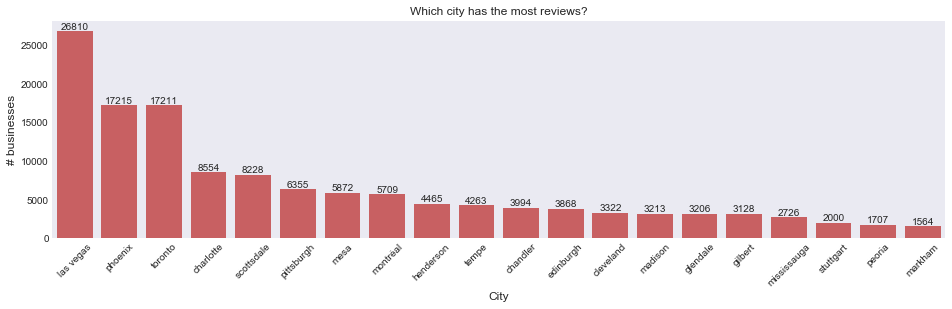

In [5]:
#Get the distribution of the ratings
x=business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[3])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

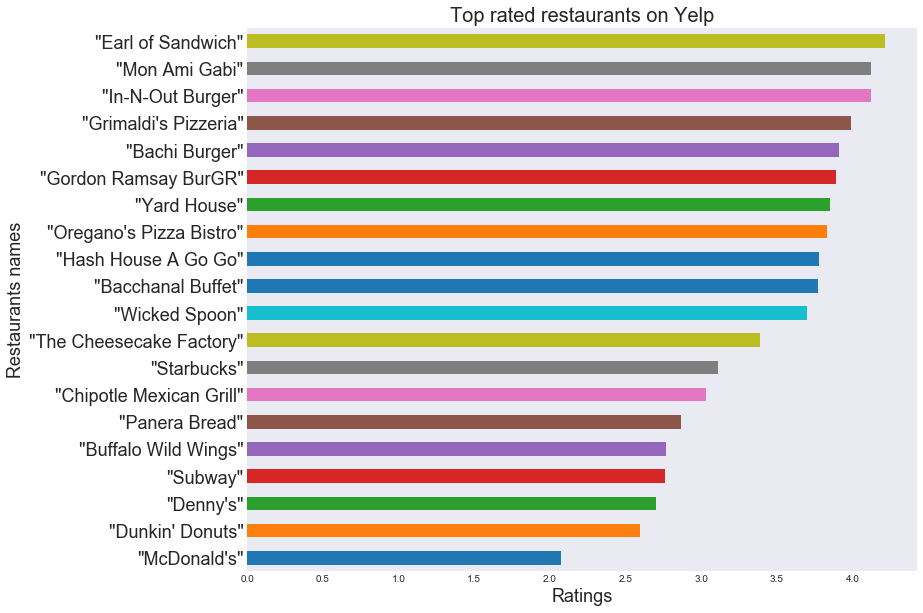

In [20]:
# df_yelp_review dataset has business id but don't have businesss name.
# But df_yelp_business_restaurants have business name and business id.
# So I take the df_yelp_review business_id and match with df_yelp_business_restaurants business id.
# And take the business name from df_yelp_business_restaurants and create a new column in df_yelp_review that holds business name
reviews['name'] = reviews['business_id'].map(business.set_index('business_id')['name'])
# take the top only 20 most occurances restaurants for analysis. Because the dataset has over thousand business id. It will be really inefficient if we take all of the business name
top_restaurants = reviews.name.value_counts().index[:20].tolist()
# create a new dataframe called 'df_review_top' that only contains the reviews of 'top_restaurants'
df_review_top = reviews.loc[reviews['name'].isin(top_restaurants)]
# now we take the name column and count mean of stars of each unique business name (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then sort values in ascending order 

# then plot the graph
a=df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True)
a.plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top rated restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

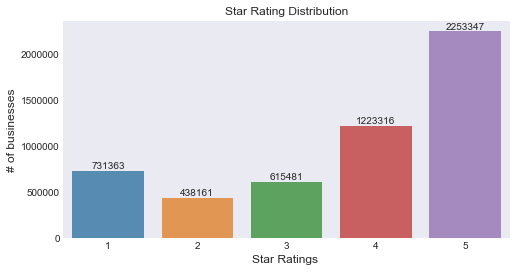

In [21]:
#Get the distribution of the ratingsfor yelp_review
x=reviews['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [22]:
user_agg=reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [23]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id        date             useful  funny   cool  \
                           count         min         max    sum    sum    sum   
user_id                                                                         
CxDOIDnH8gp9KXzpBHJYXw      3569  2009-11-09  2017-12-05  11345   5546   6695   
bLbSNkLggFnqwNNzzq-Ijw      2077  2012-05-20  2017-12-11  23572  12630  16303   
PKEzKWv_FktMm2mGPjwd0Q      1611  2008-12-12  2017-12-05  12078   4987   8183   
DK57YibC5ShBmqQl97CKog      1463  2006-02-12  2017-12-10  13175   6693  10795   
QJI9OSEn6ujRCtrX06vs1w      1322  2007-03-20  2016-05-01   8748   4104   6142   
d_TBs6J3twMy9GChqUEXkg      1184  2010-12-27  2017-11-23   2992   1341   1792   
ELcQDlf69kb-ihJfxZyL0A      1159  2011-04-10  2017-12-10   2155   1298   1029   
cMEtAiW60I5wE_vLfTxoJQ      1126  2009-06-12  2017-12-07   1943   1213   1509   
hWDybu_KvYLSdEFzGrniTw      1117  2009-03-08  2017-11-26   7234   4968   5762   
U4INQZOPSUaj8hMjLlZ3KA      1101  2008-05-13  2017-12-11   6116   2832   4187   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.201737  
bLbSNkLggFnqwNNzzq-Ijw  3.256139  
PKEzKWv_FktMm2mGPjwd0Q  3.664804  
DK57YibC5ShBmqQl97CKog  3.826384  
QJI9OSEn6ujRCtrX06vs1w  3.622542  
d_TBs6J3twMy9GChqUEXkg  3.463682  
ELcQDlf69kb-ihJfxZyL0A  2.993097  
cMEtAiW60I5wE_vLfTxoJQ  4.066607  
hWDybu_KvYLSdEFzGrniTw  3.640107  
U4INQZOPSUaj8hMjLlZ3KA  3.714805

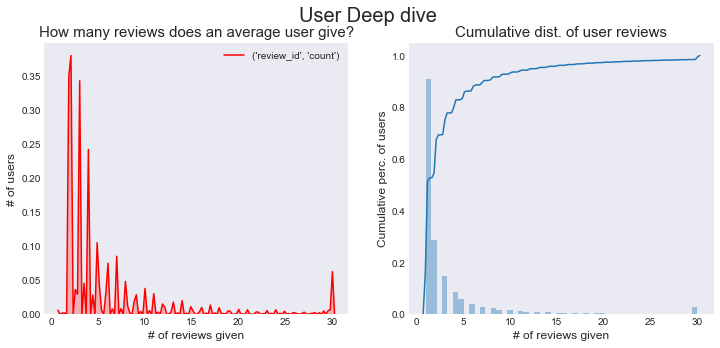

Took 1784.9071021080017 s


In [24]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()
end_time=time.time()
print("Took",end_time-start_time,"s")

In [25]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate']
selected_words

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)
#corpus = ['This is the first document.','This is the second second document.']
#print corpus
selected_word_count = vectorizer.fit_transform(tip['text'].values.astype('U'))
vectorizer.get_feature_names()

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [27]:
word_count_array = selected_word_count.toarray()
word_count_array.shape

(1098324, 11)

In [28]:
word_count_array.sum(axis=0)

array([22354, 77169,  5168, 26547, 27972,  3233, 10207,  2589,  1338,
         862,  1214], dtype=int64)

In [29]:
temp = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})
temp.reset_index(level=0, inplace=True)

In [30]:
temp.values

array([['awesome', 22354],
       ['great', 77169],
       ['fantastic', 5168],
       ['amazing', 26547],
       ['love', 27972],
       ['horrible', 3233],
       ['bad', 10207],
       ['terrible', 2589],
       ['awful', 1338],
       ['wow', 862],
       ['hate', 1214]], dtype=object)

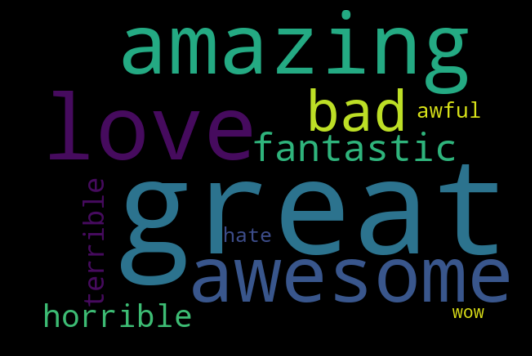

In [34]:
d = {}
for a, x in temp.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, height=400, random_state=1, max_words=200000000)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(11,6), facecolor='k')
#plt.title("Tips for top reviewed restaurant", fontsize=40,color='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
# Generate training data
train_labels = []
train_data = reviews['text'].head(2000).tolist()
for n in reviews['stars'].head(2000).as_matrix():
    res = 'pos' if n > 3 else 'neg'
    train_labels.append(res)

# Generate testing data
test_labels = []
test_data = reviews['text'].tail(2000).tolist()
for n in reviews['stars'].tail(2000).as_matrix():
    res = 'pos' if n > 3 else 'neg'
    test_labels.append(res)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_data)

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_counts)

In [39]:
##Testing the Performance
test_counts = count_vect.transform(test_data)
test_tfidf = tfidf_transformer.transform(test_counts)
predicted = clf.predict(test_tfidf)
print('%.1f%%' % (np.mean(predicted == test_labels) * 100))training the classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_tfidf, train_labels)

In [40]:
docs = ['this place is good', 'this place is terrible']
counts = count_vect.transform(docs)
tfidf = tfidf_transformer.transform(counts)
predicted = clf.predict(tfidf)
for doc, category in zip(docs, predicted):
    print('%r => %s' % (doc, category))

'this place is good' => pos
'this place is terrible' => neg


In [41]:
reviews['review_length'] = reviews.text.map(len)

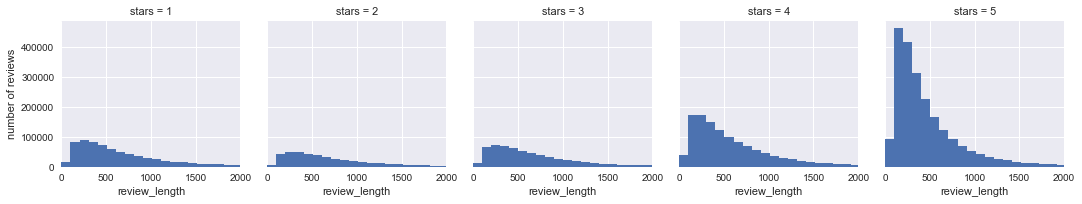

In [42]:
import seaborn as sns
sns.set()
# check how the review lengths are distributed
ax = sns.FacetGrid(data=reviews, col='stars', xlim=(0, 2000)).map(plt.hist, 'review_length', bins=50)
ax.axes[0][0].set(ylabel='number of reviews');

In [43]:
stval = reviews.groupby('stars').mean()
stval

useful     funny      cool  review_length
stars                                             
1      2.210875  0.707292  0.279544     764.181383
2      1.625610  0.668248  0.415523     769.211320
3      1.341018  0.614906  0.646093     716.108068
4      1.349785  0.567573  0.824651     631.355725
5      1.101492  0.353408  0.572854     492.783366

In [44]:
Cust = []
for i in reviews['stars']:
    if (i == 1):
        Cust.append('BAD')
    elif (i == 3) | (i == 2):
        Cust.append('NEUTRAL')
    else:
        Cust.append('GOOD')
        

reviews['Customer EXP'] = Cust
reviews['Customer EXP'].value_counts()
reviews['Text length'] = reviews['text'].apply(lambda x:len(x.split()))
reviews.head()

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool                      name  review_length Customer EXP  \
0       0      0     0              "Wilensky's"            213         GOOD   
1       0      0     0               "Tuck Shop"            502         GOOD   
2       0      0     0           "Lester's Deli"            373         GOOD   
3       0      0     0               "Five Guys"            523         GOOD   
4       0      0     0  "Maison Christian Faure"            231         GOOD   

   Text length  
0           35  
1           91  
2           67  
3          101  
4           41

Customer EXP
BAD        143.665626
GOOD        99.332216
NEUTRAL    136.993313
Name: Text length, dtype: float64

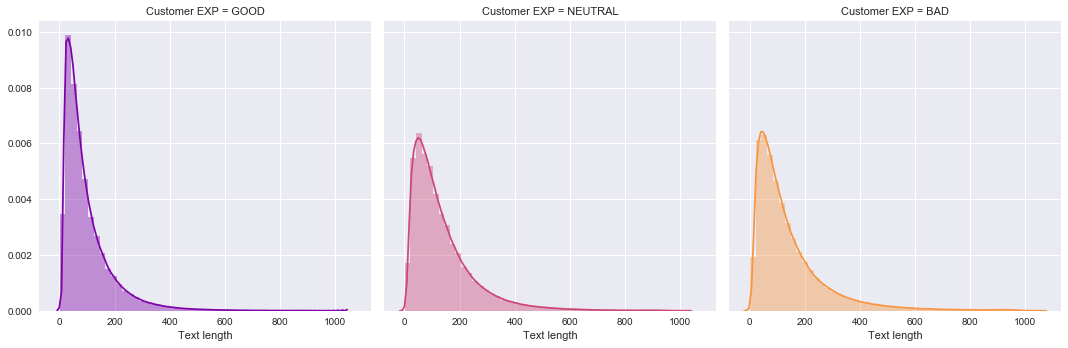

In [45]:
#exploratory data analysis
a = sns.FacetGrid(data = reviews, col = 'Customer EXP', hue = 'Customer EXP', palette='plasma', size=5)
a.map(sns.distplot, "Text length")
reviews.groupby('Customer EXP').mean()['Text length']

Number of city listed 1040


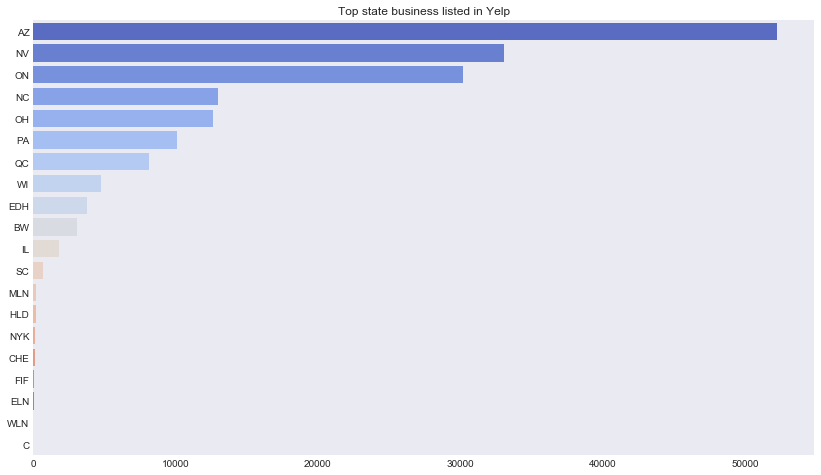

In [11]:
print('Number of city listed',business['city'].nunique())
f,ax = plt.subplots(1,1, figsize=(14,8))
#ax1,ax2, = ax.flatten()
cnt = business['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax)
ax.set_xlabel('')
ax.set_title('Top state business listed in Yelp');

Maximum number of category 36
Median category of business 3.0


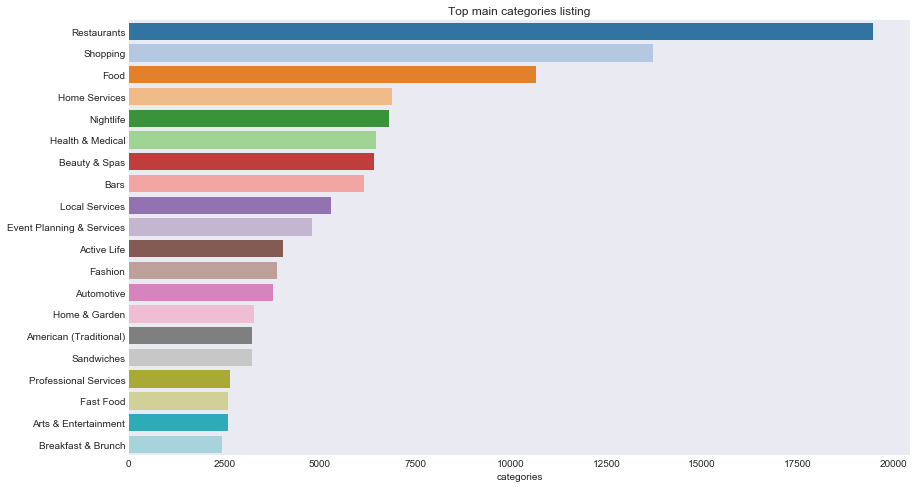

In [7]:
#We find,

#there are 1093 city listed in yelp.com
#city Las Vegas is top list in business listing in Yelp.com followed by Phoniex,Toronto etc..
#thier are 67 state listed in yelp.com
#state AZ is top in the list of Yelp.com
#There are few states having very few business listing
print('Maximum number of category',business['categories'].str.split(';').str.len().max())
print('Median category of business',business['categories'].str.split(';').str.len().median())
corpus = ' '.join(business['categories'])

corpus = pd.DataFrame(corpus.split(';'),columns=['categories'])
cnt = corpus['categories'].value_counts().to_frame()[:20]
plt.figure(figsize=(14,8))
sns.barplot(cnt['categories'], cnt.index, palette = 'tab20')
plt.title('Top main categories listing');

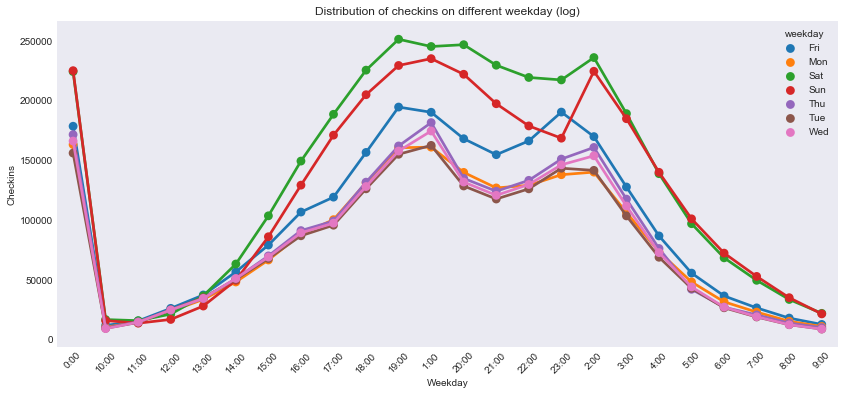

In [12]:
#timing when people visit the places:
k = checking.groupby(['weekday','hour',])['checkins'].sum().to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.pointplot(y = k['checkins'],x = k['hour'],hue = k['weekday'],alpha=0.3)
plt.ylabel('Checkins')
plt.title('Distribution of checkins on different weekday (log)')
plt.xlabel('Weekday')
plt.xticks(rotation=45);

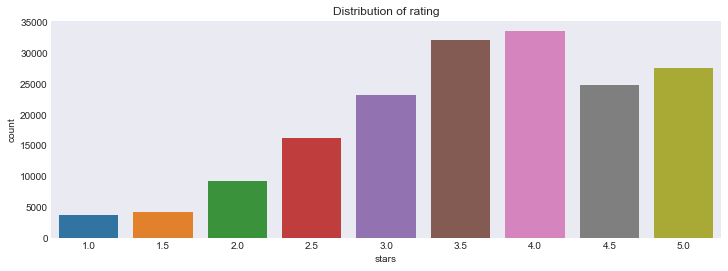

In [9]:
plt.figure(figsize=(12,4))
ax = sns.countplot(business['stars'])
plt.title('Distribution of rating');

In [4]:
x=business[['name','city', 'stars']].sort_values(ascending=False, by="stars")
grouped=x.groupby('city')
#print (x)
for name, group in grouped:
    print("\n",name)
    print(group)


 110 Las Vegas
                  name           city  stars
82049  "ABZ Auto Care"  110 Las Vegas    5.0

 AGINCOURT
               name       city  stars
37094  "McDonald's"  AGINCOURT    2.5

 Aberdour
                     name      city  stars
140073  "Aberdour Castle"  Aberdour    4.0

 Aberlady
                             name      city  stars
136456      "Ducks at Kilspindie"  Aberlady    5.0
67553   "Gosford Bothy Farm Shop"  Aberlady    3.5

 Ahwahtukee
                           name        city  stars
42985  "Horton Carpet Cleaning"  Ahwahtukee    5.0

 Ahwatukee
                                           name       city  stars
38848                     "Kathy's Alterations"  Ahwatukee    5.0
43527                      "Designs By Christa"  Ahwatukee    5.0
73056   "Healthy and Clean Living Environments"  Ahwatukee    4.5
14299                     "Desert Dog Pet Care"  Ahwatukee    4.5
5537                      "Sprinkler Detective"  Ahwatukee    4.5
18331                 

[108 rows x 3 columns]

 Broadview Hts
                               name           city  stars
23605  "Home Safe Home Inspections"  Broadview Hts    5.0
3691               "Catan Fashions"  Broadview Hts    2.5

 Brook Park
                                             name        city  stars
87676                             "Express Deli "  Brook Park    5.0
126306                     "Wayne's Auto Service"  Brook Park    5.0
54439                           "Charlie & Tango"  Brook Park    5.0
12720                "Park Place Airport Parking"  Brook Park    5.0
745                         "Old School Iron Gym"  Brook Park    5.0
168965                         "Conte Restaurant"  Brook Park    4.5
152474                     "Produce Place Market"  Brook Park    4.5
24639                                 "Bar Symon"  Brook Park    4.0
113429                            "Romeo's Pizza"  Brook Park    4.0
118140                                  "Quiznos"  Brook Park    4.0
28279          

52400  "Family Discount Carpet & Furniture Cleaning R...  Cooksville    1.0

 Copley
                                                   name    city  stars
165635                                  "Tidal Gardens"  Copley    5.0
112627                         "Shisler's Cheese House"  Copley    4.5
43271                                  "Big Star Pizza"  Copley    4.0
100938                                   "All Fired Up"  Copley    3.5
135663                              "Hamad Auto Repair"  Copley    3.5
109092              "Baymont Inn & Suites Copley Akron"  Copley    3.5
44883                   "Rizzi's Ristorante & Pizzeria"  Copley    3.5
172333                        "Copley Auto & Collision"  Copley    3.5
173770                        "Sisters Flower Haus Two"  Copley    3.5
50954                                         "Staples"  Copley    3.5
97767                            "Super 8 Copley Akron"  Copley    3.5
162969                        "Autobahn Service Center"  Copley

158600                 "The Cask and Still"  Firth of Forth    3.0

 Fisher
                  name    city  stars
91281  "The Wild Hare"  Fisher    4.0

 Fitchburg
                                                     name       city  stars
26271                                       "SprintPrint"  Fitchburg    5.0
26672                                  "LSM Chiropractic"  Fitchburg    5.0
96224             "Staybridge Suites Madison - Fitchburg"  Fitchburg    5.0
30073                             "Cody Campbell Fitness"  Fitchburg    5.0
92085                                         "HappyDogz"  Fitchburg    5.0
19610                                        "Star Nails"  Fitchburg    5.0
117972                          "Wunderlich Chiropractic"  Fitchburg    5.0
124001                          "Odyssey Veterinary Care"  Fitchburg    5.0
123369                                 "Bilancio Eyewear"  Fitchburg    5.0
41213                                 "MadPower Training"  Fitchburg    5.0


140408  "Just Rollin'"  Henderson and Las vegas    4.0

 Hendersonville
                         name            city  stars
132830  "Big Jim's Roadhouse"  Hendersonville    3.5

 Henderston
                                        name        city  stars
163749  "Fast Fix Jewelry and Watch Repairs"  Henderston    4.0

 Hendserson
                          name        city  stars
170279  "Ryan C Shipp, DMD MS"  Hendserson    4.5

 Herminie
                           name      city  stars
110761           "Palace Lunch"  Herminie    5.0
147244            "Zala's Cafe"  Herminie    4.5
83843   "Crabapple Park & Pool"  Herminie    3.5

 Highland Heights
                                                     name              city  \
101200                                "ASpot Salon & Spa"  Highland Heights   
95002                    "Saxon Jewelers And Gemologists"  Highland Heights   
917                           "Koski DePaul Dental Group"  Highland Heights   
15523                     

59315  "Pizzeria Toppings"  Laval, Ste Dorothee    3.5

 Lavaltrie
             name       city  stars
83109  "L'Etoile"  Lavaltrie    2.5

 Laveen
                                         name    city  stars
102226            "Body Logix Mobile Massage"  Laveen    5.0
25616                       "Danzeisen Dairy"  Laveen    5.0
29842                     "Let's Help Movers"  Laveen    5.0
29767                        "The Spirit Box"  Laveen    5.0
121257     "Discount Tire Store - Laveen, AZ"  Laveen    5.0
20601                  "Laveen Total Eyecare"  Laveen    5.0
123158                   "Encore Renovations"  Laveen    5.0
56964       "The Sanctuary At South Mountain"  Laveen    5.0
72786                     "Laveen Smoke Shop"  Laveen    5.0
72605                     "Laveen KinderCare"  Laveen    5.0
153083           "Stinkin' Cute Soap Company"  Laveen    5.0
150696                  "The Computer Guy AZ"  Laveen    5.0
126507                      "Training Hearts"  Laveen    5.

28701                             "Laser Plus Skin Care"  McFarland    1.0

 McKees Rocks
                                               name          city  stars
25273            "Moore Performance and Race Parts"  McKees Rocks    5.0
90083                     "Tudi Mechanical Systems"  McKees Rocks    5.0
116303      "Honest Abe Carpet and Upholstery Care"  McKees Rocks    5.0
79580                         "Renewal Coffee Shop"  McKees Rocks    5.0
77933                          "Rita's Italian Ice"  McKees Rocks    5.0
38515                     "Three Rivers Auto Glass"  McKees Rocks    5.0
165566            "Esteps ATA Martial Arts Academy"  McKees Rocks    5.0
131964                    "Hellmann's Tree Service"  McKees Rocks    5.0
127685                   "Paw & Order Dog Training"  McKees Rocks    5.0
128623             "Great North American Woodworks"  McKees Rocks    5.0
136378                           "Mancini's Bakery"  McKees Rocks    5.0
73317                            "

13972                                "Pizza Hut"  Munroe Falls    2.5

 Murrysville
                                                     name         city  stars
24631          "Murrysville Spa Skin Care & Laser Center"  Murrysville    5.0
105689           "Active Chiropractic and Rehabilitation"  Murrysville    5.0
90406                                  "Kabinet Koncepts"  Murrysville    5.0
87409                           "Serenity Salon Boutique"  Murrysville    5.0
122851                                     "Pure A Salon"  Murrysville    5.0
109593                              "European Wax Center"  Murrysville    5.0
23752                                  "Melody's Massage"  Murrysville    5.0
64879                            "Infinity Comics & More"  Murrysville    5.0
62072     "Berries and Birch Flowers, Gifts & Home Decor"  Murrysville    5.0
83556                            "Alluring Designs Salon"  Murrysville    5.0
81587                             "Jennuine Cakes & Cafe" 

45947                   "Martone"  Old Town    3.0

 Old Town Scottsdale
                         name                 city  stars
47887  "Rock Of Ages Psychic"  Old Town Scottsdale    4.0

 Olivos
                                          name    city  stars
73592                       "Compañía del Sol"  Olivos    4.5
110658                     "Bucaré Cervecería"  Olivos    4.5
125091                               "Arnaldo"  Olivos    4.5
133280                              "La Norma"  Olivos    4.5
16069                 "El Club de la Milanesa"  Olivos    4.5
24154                      "Le Pain Quotidien"  Olivos    4.0
98643               "Gastronomada Food Trucks"  Olivos    4.0
172502          "Sociedad Alemana de Gimnasia"  Olivos    4.0
133382                         "Club Hungaria"  Olivos    4.0
51585                               "D' Lucky"  Olivos    4.0
41785                       "Dominaria Comics"  Olivos    4.0
153084                               "Havanna"  Olivos    

146554                               "Pizza Hut"  Richmond Heights    2.0

 Richmond Hil
                  name          city  stars
25000  "Caffe Demetre"  Richmond Hil    3.0

 Richmond Hill
                                         name           city  stars
24578         "Greater Toronto Notary Public"  Richmond Hill    5.0
119788     "Professional Shoe & Leather Care"  Richmond Hill    5.0
19055                         "Mattress Mall"  Richmond Hill    5.0
122688                          "Nail Parade"  Richmond Hill    5.0
21558                             "Pizzaiolo"  Richmond Hill    5.0
114078      "Photasia Photography Reimagined"  Richmond Hill    5.0
115442                     "Optical Eyeworks"  Richmond Hill    5.0
41128                          "Club D'Elite"  Richmond Hill    5.0
41835                   "Muscle Body Therapy"  Richmond Hill    5.0
48480                   "Oak Ridges Eye Care"  Richmond Hill    5.0
50428               "Lucky Eight Auto Repair"  Richmond Hil

25455             "Sheena's Kitchen"  Schomberg    3.0

 Schottsdale
                           name         city  stars
125462  "Eat Fit Go Scottsdale"  Schottsdale    3.0

 Schwaikheim
                               name         city  stars
102354  "Chinarestaurant Hong Kong"  Schwaikheim    4.5
147123                      "Linde"  Schwaikheim    4.5
136689                  "Wiesental"  Schwaikheim    2.5

 Schwieberdingen
                                name             city  stars
31269            "Ristorante in2due"  Schwieberdingen    5.0
133356              "Frisierstube 2"  Schwieberdingen    4.5
17309                        "Tango"  Schwieberdingen    4.5
107072          "Pizzeria Ambrosino"  Schwieberdingen    4.0
4561    "Bibliothek Schwieberdingen"  Schwieberdingen    4.0
159045                      "Pronto"  Schwieberdingen    3.0
113935        "Ambrosino Supermarkt"  Schwieberdingen    3.0
157435     "Mercure Schwieberdingen"  Schwieberdingen    1.5

 Schönaich
          

134253                        "Bank Of America"  Sun Lakes    1.5

 Sun Prairie
                                                name         city  stars
98842                              "Kicks Unlimited"  Sun Prairie    5.0
104652                "Radon Solutions of Wisconsin"  Sun Prairie    5.0
104653                       "Clean Green Wisconsin"  Sun Prairie    5.0
25053                   "Sun Prairie Public Library"  Sun Prairie    5.0
104057                          "Abarrotes El Primo"  Sun Prairie    5.0
106082                          "Sunbox Photography"  Sun Prairie    5.0
90645                                 "Sweet Cheeks"  Sun Prairie    5.0
91631                              "Beef Butter BBQ"  Sun Prairie    5.0
29052               "North Bristol Sportsman's Club"  Sun Prairie    5.0
20443                          "MO'Wyz Dry Cleaners"  Sun Prairie    5.0
126228                             "Tug Away Towing"  Sun Prairie    5.0
109774                         "Two Tall Dis

31756   "GetGo Fuel Station"  Warrensville    2.5

 Warrensville Heights
                                                name                  city  \
20210                 "Core Fitness Training Center"  Warrensville Heights   
40254                             "W.F. Hann & Sons"  Warrensville Heights   
53010                    "Results Personal Training"  Warrensville Heights   
152116                                 "Cafe Benice"  Warrensville Heights   
3644          "Allied Integrative Health & Wellness"  Warrensville Heights   
106768      "VCA Great Lakes Veterinary Specialists"  Warrensville Heights   
118965                 "DSW Designer Shoe Warehouse"  Warrensville Heights   
22297                                 "Cafe Avalaun"  Warrensville Heights   
112920                                "VIP Plumbing"  Warrensville Heights   
116848                                       "Zoup!"  Warrensville Heights   
78324                               "Arslanian Bros"  Warrensville He

In [5]:
#new addition
x=business.city.value_counts()
x.head()

Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: city, dtype: int64

In [6]:
city_business_reviews = business[['city', 'review_count', 'stars']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews.head(10)

review_count     stars
city                              
Las Vegas        1604173  3.709916
Phoenix           576709  3.673793
Toronto           430923  3.487272
Scottsdale        308529  3.948529
Charlotte         237115  3.571554
Pittsburgh        179471  3.629819
Henderson         166884  3.789362
Tempe             162772  3.729885
Mesa              130883  3.636024
Montréal          122620  3.706604

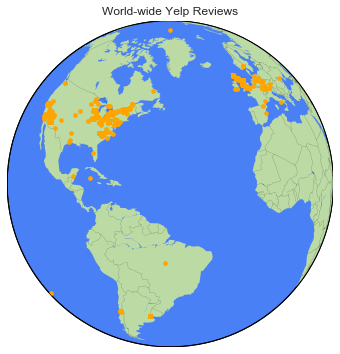

In [8]:
#basic basemap of the world
plt.figure(1, figsize=(15,6))
# use ortho projection for the globe type version
m1=Basemap(projection='ortho',lat_0=20,lon_0=-50)

# hex codes from google maps color pallete = http://www.color-hex.com/color-palette/9261
#add continents
m1.fillcontinents(color='#bbdaa4',lake_color='#4a80f5') 
# add the oceans
m1.drawmapboundary(fill_color='#4a80f5')                
# Draw the boundaries of the countires
m1.drawcountries(linewidth=0.1, color="black")

#Add the scatter points to indicate the locations of the businesses
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Reviews")
plt.show()